Name: Jay Goyal

Roll no.: C017

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 22nd January

Date of Submission: 29th January

Experiment Number: 3

Aim = 

a) To write a program in PYTHON to perform histogram equalization

Conclusion: Outcome:

From the experiment we learnt how to plot histogram equalization.

In [ ]:
#Importing all the required Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [ ]:
img = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

In [ ]:
res

array([[ 91,  91,  91, ..., 109, 109,  92],
       [ 91,  91,  91, ..., 100, 100,  85],
       [ 91,  91,  91, ..., 100, 100,  85],
       ...,
       [ 97,  97,  94, ..., 206, 206, 199],
       [ 98,  98,  96, ..., 206, 206, 183],
       [ 98,  98,  96, ..., 206, 206, 183]], dtype=uint8)

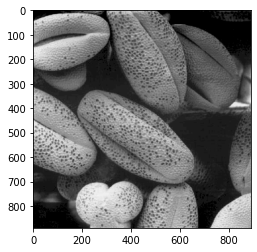

In [ ]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/Fig0310(b)(washed_out_pollen_image).tif')

# display the image
plt.imshow(img, cmap='gray')

(array([5.5171e+04, 0.0000e+00, 8.7500e+02, 4.5620e+03, 3.5501e+04,
        6.0247e+04, 3.2086e+04, 2.3675e+04, 1.7640e+04, 0.0000e+00,
        1.7445e+04, 1.8284e+04, 1.6057e+04, 1.8113e+04, 1.9929e+04,
        2.4878e+04, 0.0000e+00, 2.4656e+04, 0.0000e+00, 2.2314e+04,
        2.5152e+04, 2.5185e+04, 3.0086e+04, 2.6031e+04, 2.6844e+04,
        2.7187e+04, 0.0000e+00, 3.0203e+04, 2.3998e+04, 2.2041e+04,
        2.0556e+04, 1.8887e+04, 1.9455e+04, 0.0000e+00, 1.5023e+04,
        0.0000e+00, 1.3035e+04, 1.1817e+04, 1.2330e+04, 9.5770e+03,
        8.5250e+03, 8.7720e+03, 8.0450e+03, 0.0000e+00, 8.4710e+03,
        5.1560e+03, 2.2760e+03, 2.2600e+02, 6.0000e+00, 4.0000e+00]),
 array([ 91.  ,  91.94,  92.88,  93.82,  94.76,  95.7 ,  96.64,  97.58,
         98.52,  99.46, 100.4 , 101.34, 102.28, 103.22, 104.16, 105.1 ,
        106.04, 106.98, 107.92, 108.86, 109.8 , 110.74, 111.68, 112.62,
        113.56, 114.5 , 115.44, 116.38, 117.32, 118.26, 119.2 , 120.14,
        121.08, 122.02, 122.96

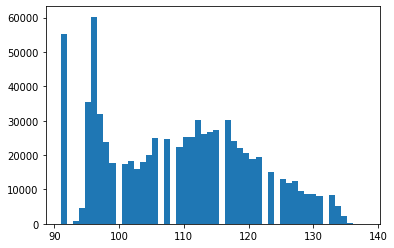

In [ ]:
# convert our image into a numpy array
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [ ]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

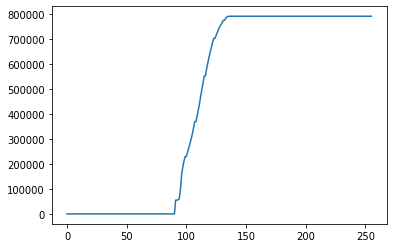

In [ ]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

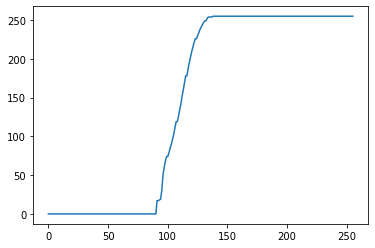

In [ ]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

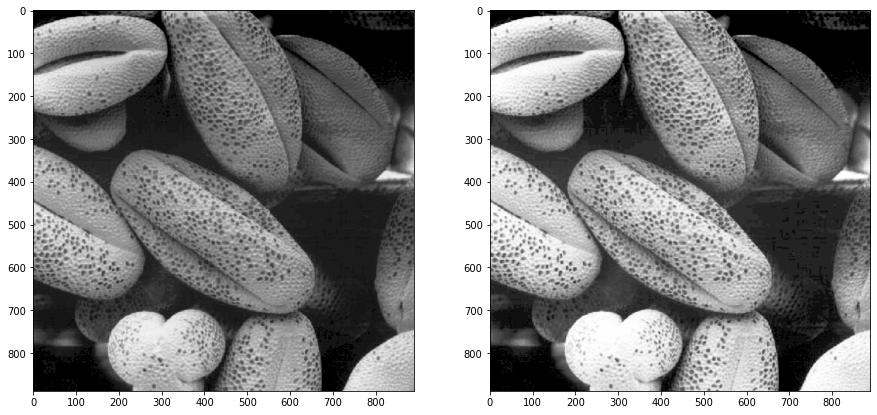

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)